# Markowitz Portfolio Network MPN
https://blog.naver.com/chunjein/222492404960

## Preprocessing Data

In [1]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np

In [2]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')
print(tickers[1])

                     Company Exchange Symbol                        Industry  \
0                         3M     NYSE    MMM                    Conglomerate   
1           American Express     NYSE    AXP              Financial services   
2                      Amgen   NASDAQ   AMGN               Biopharmaceutical   
3                      Apple   NASDAQ   AAPL          Information technology   
4                     Boeing     NYSE     BA           Aerospace and defense   
5                Caterpillar     NYSE    CAT         Construction and Mining   
6                    Chevron     NYSE    CVX              Petroleum industry   
7              Cisco Systems   NASDAQ   CSCO          Information technology   
8                  Coca-Cola     NYSE     KO                      Soft Drink   
9                     Disney     NYSE    DIS  Broadcasting and entertainment   
10                       Dow     NYSE    DOW               Chemical industry   
11             Goldman Sachs     NYSE   

In [3]:
# tickers = tickers[0]
# symbols = tickers.sort_values('Date first added')['Symbol'][:50]
symbols = tickers[1]['Symbol'].sort_values()

In [4]:
symbols = symbols.reset_index(drop=True)

In [5]:
return_d = pdr.yahoo.daily.YahooDailyReader(symbols, start='JAN-01-2000')
df = return_d.read()
return_d.close()

In [6]:
df = df['Adj Close']
df

Symbols,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,0.787035,46.445210,35.842426,26.747137,13.109969,NaN,39.000420,19.325571,22.631672,NaN,...,28.329426,36.853390,4.908101,30.372072,19.190567,5.509178,NaN,20.405434,20.111469,46.470005
2000-01-03,0.856887,48.668404,33.902096,25.940281,13.545224,NaN,39.341740,18.656288,23.115252,NaN,...,28.513895,36.794209,4.765745,29.713701,18.798925,5.573993,NaN,19.866806,19.638779,44.915390
2000-01-04,0.784643,44.946972,32.621986,25.899935,13.371121,NaN,37.134590,18.656288,24.469286,NaN,...,27.512472,35.551308,4.505793,29.141943,18.549694,5.502696,NaN,19.224625,18.908226,43.234753
2000-01-05,0.796124,46.493549,31.793428,27.513643,13.684509,NaN,37.020821,18.990944,25.484810,NaN,...,28.592943,35.926163,4.765745,28.587513,18.407272,5.489733,NaN,19.866806,19.123095,42.352398
2000-01-06,0.727229,47.266811,32.441170,27.796038,14.380914,NaN,36.406460,19.799658,24.469286,NaN,...,28.830133,34.722694,4.740985,29.904274,18.763321,5.690656,NaN,19.765909,18.564438,42.814571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24,161.619995,226.080002,158.929993,204.199997,214.330002,223.029999,56.900002,127.180000,137.460007,56.619999,...,78.830002,296.369995,146.000000,161.300003,168.830002,462.269989,201.850006,52.959999,52.380001,140.199997
2022-01-25,159.779999,225.039993,173.110001,204.100006,214.309998,215.389999,56.110001,132.589996,136.509995,57.180000,...,79.459999,288.489990,145.479996,159.539993,168.600006,456.839996,202.000000,52.900002,50.990002,137.149994
2022-01-26,159.690002,222.539993,175.320007,194.270004,214.289993,211.000000,55.330002,132.690002,133.600006,57.220001,...,79.139999,296.709991,143.990005,158.149994,167.860001,458.429993,205.869995,51.020000,49.759998,135.750000


2000년 이후부터 모든 시점에 데이터가 있는 기업만 활용

In [7]:
df = df.dropna(axis=1)
df = df.pct_change()
df = df.dropna()

In [8]:
column = df.columns
column

Index(['AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'GS', 'HD',
       'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT',
       'NKE', 'PG', 'TRV', 'UNH', 'VZ', 'WBA', 'WMT'],
      dtype='object', name='Symbols')

훈련 데이터 : 2000년 1월 ~ 2015년 11월 (4000)
검증 데이터 : 2015년 11월 ~

In [9]:
df_train = df.iloc[:4000]
df_test = df.iloc[4000:]
df_train.head()

Symbols,AAPL,AMGN,AXP,BA,CAT,CSCO,CVX,DIS,GS,HD,...,MMM,MRK,MSFT,NKE,PG,TRV,UNH,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.088754,0.047867,-0.054135,-0.030166,0.033200,0.008752,-0.034632,0.021367,-0.062375,-0.051818,...,-0.035760,0.006512,-0.001606,-0.029004,-0.021677,-0.020408,0.011765,-0.026396,-0.023504,-0.033454
2000-01-04,-0.084310,-0.076465,-0.037759,-0.001555,-0.012853,-0.056102,0.000000,0.058578,-0.062987,-0.052733,...,-0.039735,-0.035121,-0.033780,-0.054546,-0.019242,-0.013258,-0.012791,-0.032324,-0.037199,-0.037418
2000-01-05,0.014633,0.034409,-0.025399,0.062306,0.023438,-0.003064,0.017938,0.041502,-0.046828,0.020243,...,0.028966,0.039272,0.010544,0.057693,-0.019025,-0.007678,-0.002356,0.033404,0.011364,-0.020408
2000-01-06,-0.086538,0.016632,0.020373,0.010264,0.050890,-0.016595,0.042584,-0.039848,0.042790,-0.047619,...,0.080429,0.008295,-0.033498,-0.005195,0.046061,0.019343,0.036600,-0.005079,-0.029214,0.010913
2000-01-07,0.047369,0.112475,0.014559,0.029028,0.032688,0.058750,0.017605,-0.015810,0.003798,0.058333,...,0.019851,0.095978,0.013068,0.000000,0.079954,0.039848,0.117312,-0.007384,0.025463,0.075565


특정일을 기준으로 이전 60개 데이터가 인풋  
이후 20개의 데이터 시퀀스를 모델을 통해 추정  
이후 20개의 데이터가 타겟

In [10]:
N_time = 60
N_future = 20
N_stock = 27

In [11]:
xc_train = np.zeros((4000-N_time-N_future, N_time, N_stock), np.float32)
xf_train = np.zeros((4000-N_time-N_future, N_future, N_stock), np.float32)

for i in range(N_time, 4000-N_future):
    xc_train[i-N_time] = df_train.iloc[i-N_time:i]
    xf_train[i-N_time] = df_train.iloc[i+1:i+1+N_future]
print(xc_train.shape, xf_train.shape)

(3920, 60, 27) (3920, 20, 27)


In [12]:
xc_test = np.zeros((len(df_test)-N_time-N_future, N_time, N_stock), np.float32)
xf_test = np.zeros((len(df_test)-N_time-N_future, N_future, N_stock), np.float32)

for i in range(N_time, len(df_test)-N_future):
    xc_test[i-N_time] = df_test.iloc[i-N_time:i]
    xf_test[i-N_time] = df_test.iloc[i+1:i+1+N_future]
print(xc_test.shape, xf_test.shape)

(1475, 60, 27) (1475, 20, 27)


In [13]:
print(xc_train.shape, xf_train.shape)
print(xc_test.shape, xf_test.shape)

(3920, 60, 27) (3920, 20, 27)
(1475, 60, 27) (1475, 20, 27)


## Build Model

In [14]:
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow.keras.layers import Input, LSTM, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [15]:
BATCH = 64
GAMMA_CONST = 0.1
REG_CONST = 0.1
SAVE_MODEL = 'data/2-1.Markowitz_network.h5'

### Markowitz Portfolio (Modern Portfolio Theory)
https://en.wikipedia.org/wiki/Modern_portfolio_theory  
각 종목 수익률의 평균을 최대화  
각 종목 간 공분산 (리스크) 최소화

In [16]:
def markowitz_objective(y_true, y_pred):
    W = y_pred
    xf_rtn = y_true
    W = tf.expand_dims(W, axis=1)
    R = tf.expand_dims(tf.reduce_mean(xf_rtn, axis=1), axis=2)
    C = tfp.stats.covariance(xf_rtn, sample_axis=1)
    
    rtn = tf.matmul(W, R)
    vol = tf.matmul(W, tf.matmul(C, tf.transpose(W, perm=[0, 2, 1])))*GAMMA_CONST
    # Regularization term
    reg = tf.reduce_sum(tf.square(W), axis=-1)*REG_CONST
    objective = rtn - vol - reg
    
    return -tf.reduce_mean(objective, axis=0)
# 마코비츠 최적 가중치를 maximize-> 음수로 바꿔서 loss처럼 계산

In [17]:
xc_input = Input(batch_shape=(None, N_time, N_stock))
h_lstm = LSTM(64, dropout=.5)(xc_input)
y_output = Dense(N_stock, activation='tanh')(h_lstm) #linear projection

y_output = Activation('softmax')(y_output)  # 합이 1인 가중치 분포 출력

model = Model(xc_input, y_output)
model.compile(loss=markowitz_objective, optimizer=Adam(learning_rate=1e-5))

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60, 27)]          0         
                                                                 
 lstm (LSTM)                 (None, 64)                23552     
                                                                 
 dense (Dense)               (None, 27)                1755      
                                                                 
 activation (Activation)     (None, 27)                0         
                                                                 
Total params: 25,307
Trainable params: 25,307
Non-trainable params: 0
_________________________________________________________________


In [19]:
hist = model.fit(xc_train*20, xf_train*20, epochs=150, batch_size=BATCH,
                validation_data=(xc_test*20, xf_test*20))
model.save(SAVE_MODEL)

Epoch 1/150
62/62 [==============================] - 7s 22ms/step - loss: -2.0515e-04 - val_loss: -0.0053
Epoch 2/150
62/62 [==============================] - 1s 9ms/step - loss: -2.2172e-04 - val_loss: -0.0053
Epoch 3/150
62/62 [==============================] - 1s 9ms/step - loss: -2.2534e-04 - val_loss: -0.0053
Epoch 4/150
62/62 [==============================] - 1s 9ms/step - loss: -2.2642e-04 - val_loss: -0.0053
Epoch 5/150
62/62 [==============================] - 1s 9ms/step - loss: -2.1849e-04 - val_loss: -0.0053
Epoch 6/150
62/62 [==============================] - 1s 9ms/step - loss: -2.2496e-04 - val_loss: -0.0053
Epoch 7/150
62/62 [==============================] - 1s 9ms/step - loss: -2.7055e-04 - val_loss: -0.0053
Epoch 8/150
62/62 [==============================] - 1s 9ms/step - loss: -2.7193e-04 - val_loss: -0.0053
Epoch 9/150
62/62 [==============================] - 1s 9ms/step - loss: -2.7325e-04 - val_loss: -0.0053
Epoch 10/150
62/62 [==============================] - 

62/62 [==============================] - 1s 9ms/step - loss: -0.0018 - val_loss: -0.0056
Epoch 80/150
62/62 [==============================] - 1s 9ms/step - loss: -0.0018 - val_loss: -0.0056
Epoch 81/150
62/62 [==============================] - 1s 9ms/step - loss: -0.0018 - val_loss: -0.0056
Epoch 82/150
62/62 [==============================] - 1s 9ms/step - loss: -0.0019 - val_loss: -0.0056
Epoch 83/150
62/62 [==============================] - 1s 9ms/step - loss: -0.0019 - val_loss: -0.0056
Epoch 84/150
62/62 [==============================] - 1s 9ms/step - loss: -0.0019 - val_loss: -0.0056
Epoch 85/150
62/62 [==============================] - 1s 9ms/step - loss: -0.0019 - val_loss: -0.0056
Epoch 86/150
62/62 [==============================] - 1s 9ms/step - loss: -0.0020 - val_loss: -0.0056
Epoch 87/150
62/62 [==============================] - 1s 9ms/step - loss: -0.0019 - val_loss: -0.0056
Epoch 88/150
62/62 [==============================] - 1s 9ms/step - loss: -0.0020 - val_loss: -

## Result

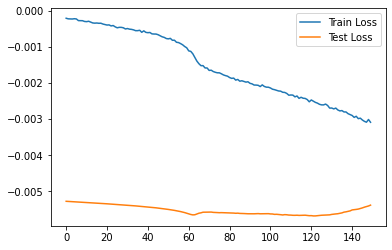

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 431ms/step


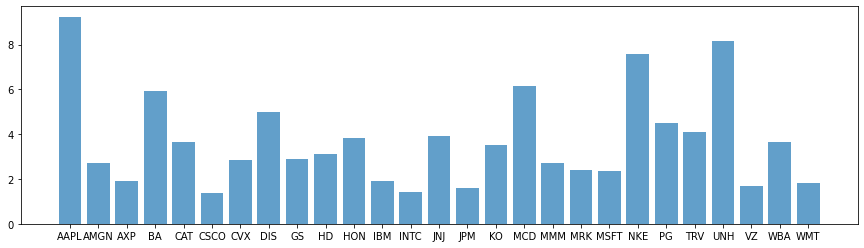

In [21]:
def check_w(n=0):
    plt.figure(figsize=(15,4))
    y_pred = model.predict(xc_test[n].reshape(1, N_time, N_stock))[0]
    plt.bar(column, y_pred*100, alpha=.7)
    plt.show()
check_w(0)

xc_test[0]으로 추정한 xf_test[0]의 최적 투자비율(W)

In [22]:
model = tf.keras.models.load_model(SAVE_MODEL, compile=False)

mpn_value = [10000]
crp_value = [10000]

w_crp = np.ones(N_stock)/N_stock
w_history = []
for i in range(N_future, xc_test.shape[0], N_future):
    x = xc_test[i][np.newaxis, :, :] * 20
    w_mpn = model.predict(x)[0]
    w_history.append(w_mpn)
    
    m_rtn = np.sum(xf_test[i], axis=0)
    
    mpn_value.append(mpn_value[-1] * np.exp(np.dot(w_mpn, m_rtn)))
    crp_value.append(crp_value[-1] * np.exp(np.dot(w_crp, m_rtn)))

1/1 [==============================] - 0s 18ms/step


In [23]:
test_date = []
for i in range(0, xc_test.shape[0], N_future):
    test_date.append(df_test.index[i])
print(len(test_date))

74


In [24]:
idx = np.arange(0, len(xc_test), N_future)

perf_df = pd.DataFrame({'crp':crp_value, 'markowitz':mpn_value},
                       index=df_test.index[idx])

In [25]:
perf_df

,crp,markowitz
Date,,
2015-11-25,10000.000000,10000.000000
2015-12-24,10245.186160,10158.016682
2016-01-26,9921.119512,9802.257571
2016-02-24,10135.504406,9973.223756
2016-03-23,10663.689125,10448.169461
...,...,...
2021-05-21,26329.294197,27695.879044
2021-06-21,25919.146693,27192.811677
2021-07-20,27118.117113,28595.227590


In [26]:
round(perf_df.iloc[-1,1]/perf_df.iloc[-1,0], 4) * 100

105.67

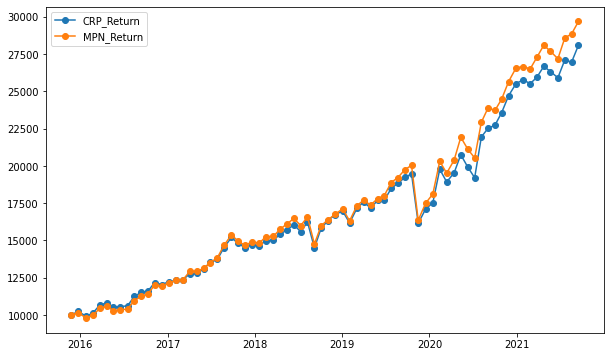

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(perf_df['crp'], 'o-', label='CRP_Return')
plt.plot(perf_df['markowitz'], 'o-', label='MPN_Return')
plt.legend()
plt.show()